In [11]:
!pip install pandas scikit-learn numpy matplotlib seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data.csv")
df.head(30)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,0
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,0
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0


In [2]:
columns_for_pca = ['Age', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
df[columns_for_pca] = df[columns_for_pca].fillna(df[columns_for_pca].mean())

X = df[columns_for_pca]

corr = X.corr()
corr

,Age,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
Age,1.000000,0.220881,0.079479,0.233464,0.118380,0.147928,0.236610,0.079368,0.069885
WaistCirc,0.220881,1.000000,0.882640,0.117564,0.042029,0.347906,0.250168,-0.342227,0.230946
BMI,0.079479,0.882640,1.000000,0.076169,0.038048,0.269618,0.208784,-0.290774,0.163208
Albuminuria,0.233464,0.117564,0.076169,1.000000,0.536214,0.176760,0.198642,-0.024188,0.107842
UrAlbCr,0.118380,0.042029,0.038048,0.536214,1.000000,0.130928,0.106458,0.001667,0.077873
UricAcid,0.147928,0.347906,0.269618,0.176760,0.130928,1.000000,0.055943,-0.252587,0.207328
BloodGlucose,0.236610,0.250168,0.208784,0.198642,0.106458,0.055943,1.000000,-0.213905,0.269506
HDL,0.079368,-0.342227,-0.290774,-0.024188,0.001667,-0.252587,-0.213905,1.000000,-0.388487
Triglycerides,0.069885,0.230946,0.163208,0.107842,0.077873,0.207328,0.269506,-0.388487,1.000000


<Axes: >

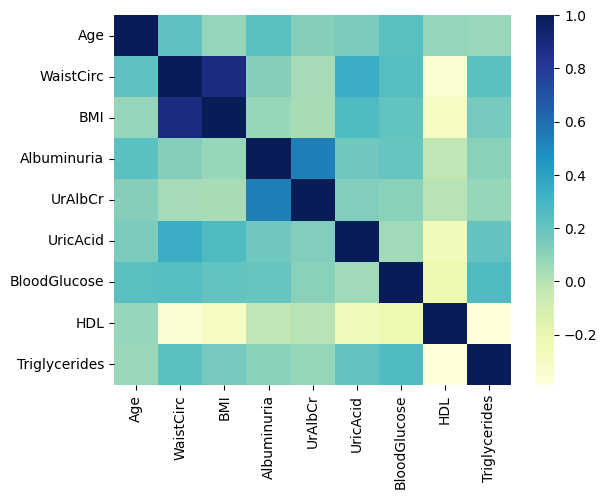

In [3]:
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="YlGnBu"
)

In [4]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

S = np.cov(np.transpose(X_standardized))

In [5]:
pca=PCA(n_components=6)

In [6]:
pca.fit(X_standardized)

PCA(n_components=6)

In [7]:
pca.components_.shape

(6, 9)

In [8]:
pca.components_[0,:]

array([ 0.19902105,  0.50868515,  0.4642411 ,  0.23032726,  0.16779264,
        0.32969422,  0.29940045, -0.3335565 ,  0.30871732])

In [18]:
# variância das componentes principais

np.round(pca.explained_variance_ratio_, 2)

array([0.3 , 0.18])

In [10]:
# variância das componentes principais acumulativa
pca.explained_variance_ratio_.cumsum()

array([0.29959263, 0.47702034, 0.60378866, 0.71727995, 0.81221343,
       0.87950359])

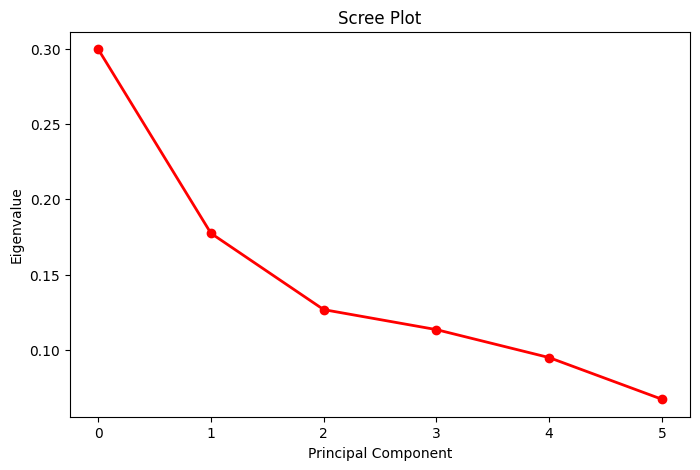

In [11]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

In [12]:
pca=PCA(n_components=2)
pca.fit(X_standardized)

PCA(n_components=2)

In [19]:
print(columns_for_pca)
np.round(pca.components_[0],3)

['Age', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']


array([ 0.199,  0.509,  0.464,  0.23 ,  0.168,  0.33 ,  0.299, -0.334,
        0.309])

In [14]:
PCA1 = pca.transform(X_standardized)[:,0]
PCA2 = pca.transform(X_standardized)[:,1]

In [15]:
df["PCA1"] = PCA1
df["PCA2"] = PCA2

In [16]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,PCA1,PCA2
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0,-1.487233,-0.568503
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0,-1.254264,-0.399682
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,-1.905190,-0.196299
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,0.315066,-0.596891
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,-1.237319,0.106989


In [21]:
df.sort_values(by="PCA1", ascending=True).head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,PCA1,PCA2
959,66056,57,Female,Divorced,6200.0,Black,77.9,21.5,0,6.52,3.4,93,138,54,0,-3.878668,1.822800
1606,68724,27,Female,Married,2000.0,MexAmerican,70.1,17.4,0,28.92,3.5,87,86,58,0,-3.612026,0.713572
2018,70333,20,Female,Single,9000.0,MexAmerican,72.7,18.0,0,10.87,2.9,90,89,106,0,-3.599943,0.519888
911,65852,29,Female,NaN,6200.0,Hispanic,66.9,22.0,0,6.94,3.6,74,97,107,0,-3.555206,0.676015
988,66179,23,Female,Single,800.0,Asian,63.1,17.8,0,10.55,4.2,72,70,64,0,-3.461885,0.363153
1488,68247,80,Female,Married,NaN,Asian,56.2,13.4,0,27.63,3.8,110,91,101,0,-3.441923,2.156327
946,66010,40,Female,NaN,2500.0,White,72.7,18.1,0,6.17,3.0,88,80,44,0,-3.367602,0.729964
1122,66714,21,Female,Single,9000.0,MexAmerican,74.2,19.0,0,11.53,3.5,93,81,35,0,-3.361305,0.393280
195,62941,55,Female,Separated,1600.0,Black,76.1,20.3,0,22.91,5.5,83,119,46,0,-3.245431,1.565997
510,64167,21,Female,Single,300.0,Asian,65.6,17.1,0,16.25,3.9,87,65,75,0,-3.244374,0.294053
